In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import praw

In [2]:
reddit = praw.Reddit(client_id='***',
                     client_secret='***',
                     redirect_uri='http://localhost:8080',
                     user_agent='testscript by /u/***')

In [3]:
subreddit = reddit.subreddit("uwaterloo")

In [10]:
top_subreddit = subreddit.top(limit=10)

In [11]:
for submission in top_subreddit:
    print(submission.selftext)

[Specifically this goose.](https://upload.wikimedia.org/wikipedia/commons/e/e0/Canada_goose_head_detail.JPG)

I'm serious. Let this be the nuclear shitpost that ends the meme war between /r/uwaterloo and /r/UofT.

[redacted]

If I don't finish the Fall 2016 exam period with a goddamn goose disrupting my ass, I will transfer to /r/UofT and denounce Feridun. 

Decide which cheek to disrupt in the comments.

---

**14:05 EST Update**: We broke 2000 in about an hour. RIP my ass cheek. This is gonna be glorious. PM me if you can recommend a tattoo artist in Toronto. 

**Second update**: This is definitely going to happen. I owe it to the internet. Over the next few days I will be in touch with some artists to design the actual tattoo. Likely the actual event will happen the first week of January. Thanks also to everyone for offering to fund the tattoo. If we decide to livestream the event, I'd prefer that we set up a site where everyone can donate to a local mental health centre or food ban

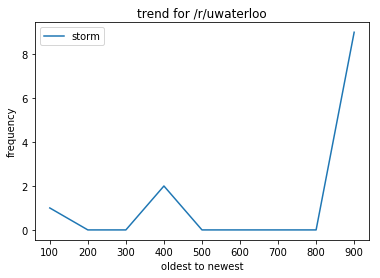

In [38]:
# remove punctuation
def removePunctuation(word):
    punctuation = ['!', '?', '-', ',', '.', "'", '"']
    for char in punctuation:
        if char in word:
            word.replace(char, "")
    return word

# add 's' suffix
def combinePlural(dictionary, word):
    if word + 's' in dictionary:
        word += dictionary[word + 's']
    

# main function
def plotGraph(subredditName, keyword):
    
    # initialize subreddit according to parameter
    subreddit = reddit.subreddit(subredditName)
    
    # get last 900 submissions from subreddit
    latest = subreddit.new(limit=900)
    
    # initialize empty list to keep dictionary of words for each interval
    wordList = [{}]
    
    # initialize x-axis and y-axis intervals and submission count
    submissionCount = 0
    i = 0
    x = range(100, 901, 100)
    y = []
    
    # iterate through submissions and keep count of every word in description
    for submission in latest:
        
        submissionCount += 1
    
    # document words from title
        for word in submission.title.lower().split():
            if removePunctuation(word) in wordList[i]:
                wordList[i][word] += 1
            else:
                wordList[i][word] = 1
    
    # document words from description
        for word in submission.selftext.lower().split():
            if removePunctuation(word) in wordList[i]:
                wordList[i][word] += 1
            else:
                wordList[i][word] = 1
                
    # determine if loop has reached an interval and should start a new dictionary
        if submissionCount == x[i]:
            if keyword in wordList[i]:
                y.append(wordList[i][keyword])
                
    # take into account the plural form of the keyword
                if keyword + 's' in wordList[i]:
                    wordList[i][keyword] += wordList[i][keyword + 's']
                
            else:
                y.append(0)
            i += 1
            wordList.append({})
    
    
    # plot a graph
    plt.plot(x, y[::-1], label = keyword)
    
plotGraph("uwaterloo", "storm")
plt.xlabel("oldest to newest")
plt.ylabel("frequency")
plt.title("trend for " + "/r/uwaterloo")
plt.legend()    